In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


602

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hervey bay
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | lorengau
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | coruripe
Processing Record 6 of Set 1 | tautira
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | bajina basta
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | prince rupert
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | magadan
Processing Record 20 of Set 1 | flinders
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 o

Processing Record 39 of Set 4 | norman wells
Processing Record 40 of Set 4 | luxor
Processing Record 41 of Set 4 | bandarbeyla
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | roma
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | hofn
Processing Record 46 of Set 4 | crateus
Processing Record 47 of Set 4 | santa vitoria do palmar
Processing Record 48 of Set 4 | port moresby
Processing Record 49 of Set 4 | artesia
Processing Record 50 of Set 4 | marienburg
Processing Record 1 of Set 5 | mandal
Processing Record 2 of Set 5 | barrow
Processing Record 3 of Set 5 | namtsy
Processing Record 4 of Set 5 | calvia
Processing Record 5 of Set 5 | leh
Processing Record 6 of Set 5 | linda
Processing Record 7 of Set 5 | khatanga
Processing Record 8 of Set 5 | zhigalovo
Processing Record 9 of Set 5 | mino
Processing Record 10 of Set 5 | tasiilaq
Processing Record 11 of Set 5 | elizabeth city
Processing Record 12 of Set 5 | hithadhoo
Processing Record 1

Processing Record 26 of Set 8 | nguiu
City not found. Skipping...
Processing Record 27 of Set 8 | maldonado
Processing Record 28 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 29 of Set 8 | nalut
Processing Record 30 of Set 8 | kruisfontein
Processing Record 31 of Set 8 | ostersund
Processing Record 32 of Set 8 | araxa
Processing Record 33 of Set 8 | nanortalik
Processing Record 34 of Set 8 | sovkhoznyy
Processing Record 35 of Set 8 | banepa
Processing Record 36 of Set 8 | labutta
City not found. Skipping...
Processing Record 37 of Set 8 | conceicao do araguaia
Processing Record 38 of Set 8 | gorno-chuyskiy
City not found. Skipping...
Processing Record 39 of Set 8 | bilma
Processing Record 40 of Set 8 | xinzhou
Processing Record 41 of Set 8 | jiddah
City not found. Skipping...
Processing Record 42 of Set 8 | tainan
Processing Record 43 of Set 8 | olawa
Processing Record 44 of Set 8 | honningsvag
Processing Record 45 of Set 8 | monte cristi
City not found. Skipping..

Processing Record 13 of Set 12 | huangmei
Processing Record 14 of Set 12 | angoche
Processing Record 15 of Set 12 | ixtapa
Processing Record 16 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 17 of Set 12 | cravo norte
Processing Record 18 of Set 12 | cocorit
Processing Record 19 of Set 12 | gombe
Processing Record 20 of Set 12 | hualmay
Processing Record 21 of Set 12 | harper
Processing Record 22 of Set 12 | baisha
Processing Record 23 of Set 12 | kangaatsiaq
Processing Record 24 of Set 12 | buala
Processing Record 25 of Set 12 | kununurra
Processing Record 26 of Set 12 | rio tuba
Processing Record 27 of Set 12 | copiapo
Processing Record 28 of Set 12 | clarence town
Processing Record 29 of Set 12 | seoul
Processing Record 30 of Set 12 | morena
Processing Record 31 of Set 12 | lake saint louis
Processing Record 32 of Set 12 | batagay-alyta
Processing Record 33 of Set 12 | vrangel
Processing Record 34 of Set 12 | zhanakorgan
Processing Record 35 of Set 12 | mrakovo
Pr

In [10]:
len(city_data)

549

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hervey Bay,-25.2986,152.8535,60.04,64,9,5.01,AU,2021-07-21 23:53:22
1,Ushuaia,-54.8000,-68.3000,37.06,60,90,9.22,AR,2021-07-21 23:53:23
2,Lorengau,-2.0226,147.2712,83.28,74,76,4.38,PG,2021-07-21 23:53:23
3,Cidreira,-30.1811,-50.2056,53.80,65,0,0.45,BR,2021-07-21 23:53:23
4,Coruripe,-10.1256,-36.1756,72.54,86,42,8.43,BR,2021-07-21 23:53:24
5,Tautira,-17.7333,-149.1500,84.22,75,45,13.27,PF,2021-07-21 23:53:24
6,Upernavik,72.7868,-56.1549,43.02,80,76,5.93,GL,2021-07-21 23:53:24
7,Torbay,47.6666,-52.7314,52.29,98,90,13.80,CA,2021-07-21 23:53:25
8,Hobart,-42.8794,147.3294,53.06,74,20,4.00,AU,2021-07-21 23:50:14
9,Isangel,-19.5500,169.2667,80.71,83,20,0.00,VU,2021-07-21 23:53:25


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hervey Bay,AU,2021-07-21 23:53:22,-25.2986,152.8535,60.04,64,9,5.01
1,Ushuaia,AR,2021-07-21 23:53:23,-54.8000,-68.3000,37.06,60,90,9.22
2,Lorengau,PG,2021-07-21 23:53:23,-2.0226,147.2712,83.28,74,76,4.38
3,Cidreira,BR,2021-07-21 23:53:23,-30.1811,-50.2056,53.80,65,0,0.45
4,Coruripe,BR,2021-07-21 23:53:24,-10.1256,-36.1756,72.54,86,42,8.43
5,Tautira,PF,2021-07-21 23:53:24,-17.7333,-149.1500,84.22,75,45,13.27
6,Upernavik,GL,2021-07-21 23:53:24,72.7868,-56.1549,43.02,80,76,5.93
7,Torbay,CA,2021-07-21 23:53:25,47.6666,-52.7314,52.29,98,90,13.80
8,Hobart,AU,2021-07-21 23:50:14,-42.8794,147.3294,53.06,74,20,4.00
9,Isangel,VU,2021-07-21 23:53:25,-19.5500,169.2667,80.71,83,20,0.00


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1626913707.585312

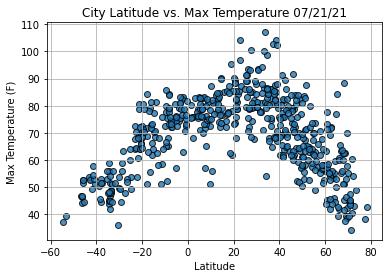

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

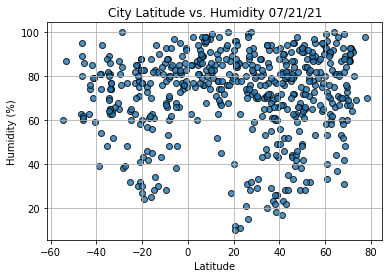

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

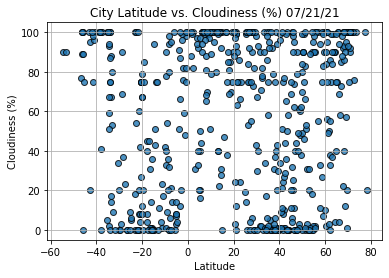

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

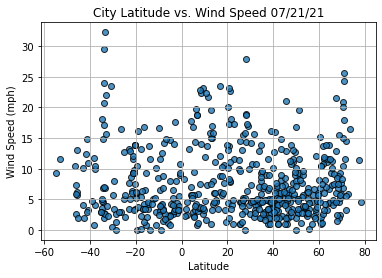

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [34]:
index13 = city_data_df.loc[13]
index13

City                       Castro
Country                        BR
Date          2021-07-21 23:53:26
Lat                      -24.7911
Lng                      -50.0119
Max Temp                    49.55
Humidity                       60
Cloudiness                      5
Wind Speed                   2.13
Name: 13, dtype: object

In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

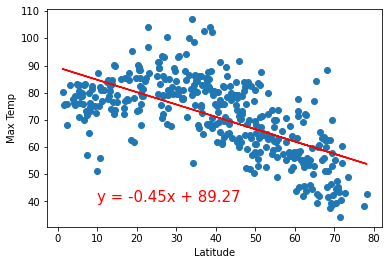

LinregressResult(slope=-0.4536753661264168, intercept=89.26591836912384, rvalue=-0.6397732417629671, pvalue=1.3573630216828165e-45, stderr=0.027884786744929634, intercept_stderr=1.2294625251764018)

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
linregress(x_values, y_values)

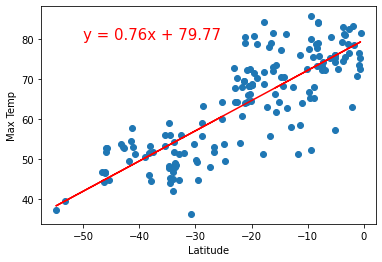

LinregressResult(slope=0.7581678597970484, intercept=79.77015027269448, rvalue=0.8141427363517971, pvalue=2.5293368242090213e-40, stderr=0.04235420279344474, intercept_stderr=1.066867597728224)

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))
linregress(x_values, y_values)

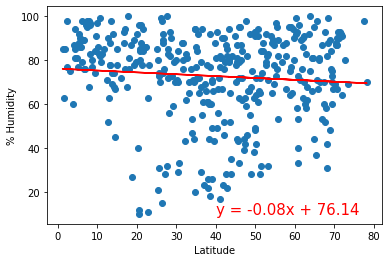

LinregressResult(slope=-0.08489791804077888, intercept=76.13707329499022, rvalue=-0.08436482949344012, pvalue=0.09878744374918086, stderr=0.05130419411908793, intercept_stderr=2.262042906434045)

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))
linregress(x_values, y_values)

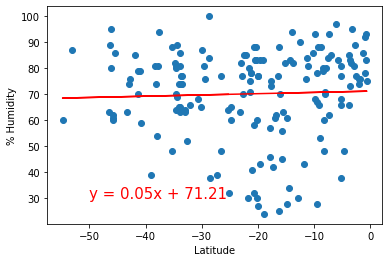

LinregressResult(slope=0.04877041722743365, intercept=71.20914382784812, rvalue=0.03777549887942073, pvalue=0.6300061696109203, stderr=0.10105140875042536, intercept_stderr=2.5454020283744994)

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))
linregress(x_values, y_values)

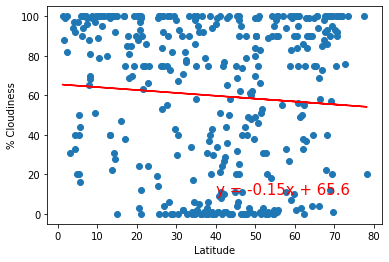

LinregressResult(slope=-0.1458885250975054, intercept=65.59843616205275, rvalue=-0.07545229688664033, pvalue=0.13998651468715986, stderr=0.09864548786837796, intercept_stderr=4.349358369540585)

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))
linregress(x_values, y_values)


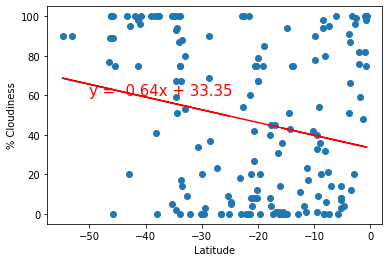

LinregressResult(slope=-0.6447322039464277, intercept=33.34969255351985, rvalue=-0.22451508236746553, pvalue=0.0037420095083998814, stderr=0.21918396920328712, intercept_stderr=5.521064245379681)

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
linregress(x_values, y_values)


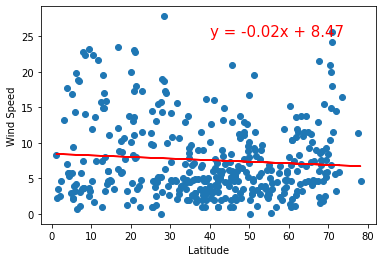

LinregressResult(slope=-0.02229390838403273, intercept=8.46629829226188, rvalue=-0.08071989950847391, pvalue=0.11428981358347759, stderr=0.014084921205176171, intercept_stderr=0.6210154286001602)

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))
linregress(x_values, y_values)

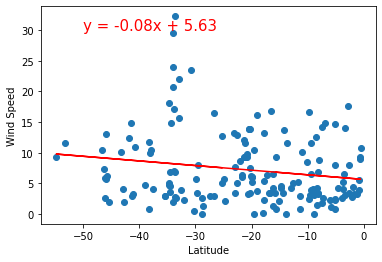

LinregressResult(slope=-0.07565917371125154, intercept=5.629532051348235, rvalue=-0.17671873499213292, pvalue=0.023168952897997364, stderr=0.03300620920076709, intercept_stderr=0.8313993133542731)

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))
linregress(x_values, y_values)